## Importing the Dependencies

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Importing dataset from sklearn

In [2]:
iris = datasets.load_iris()

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [5]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']

## Train/test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Normalize features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Try different K values

K = 1, Accuracy = 0.9666666666666667


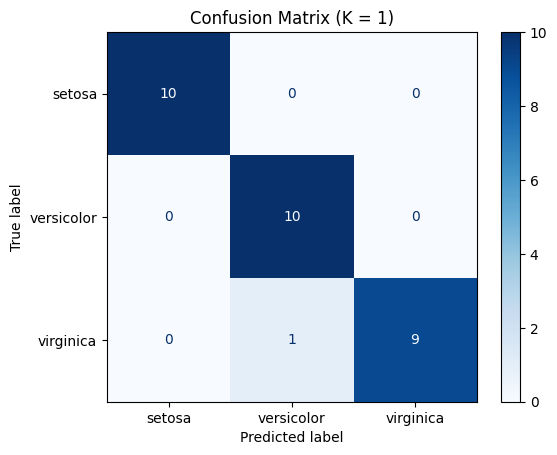

K = 3, Accuracy = 0.9333333333333333


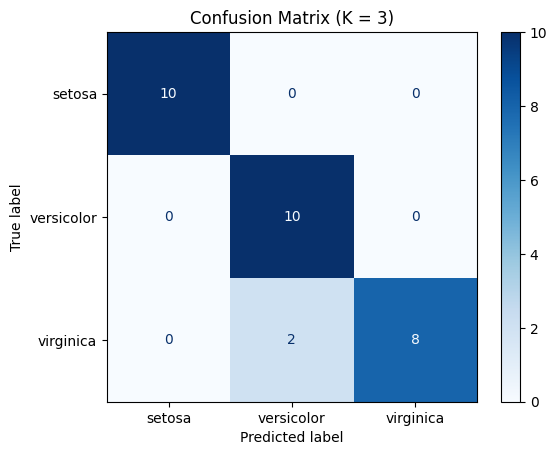

K = 5, Accuracy = 0.9333333333333333


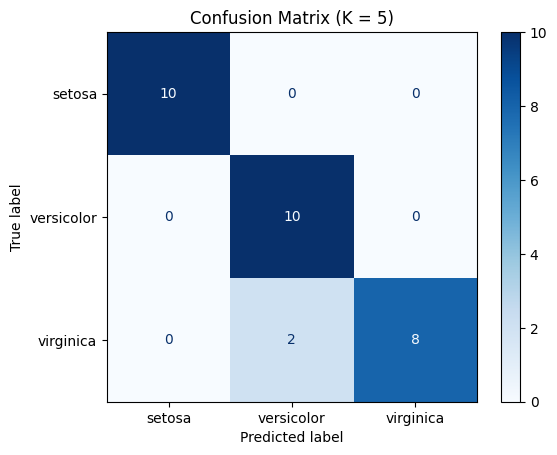

K = 7, Accuracy = 0.9666666666666667


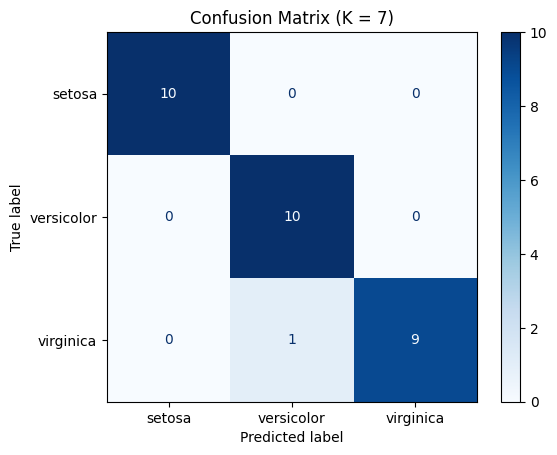

K = 9, Accuracy = 0.9666666666666667


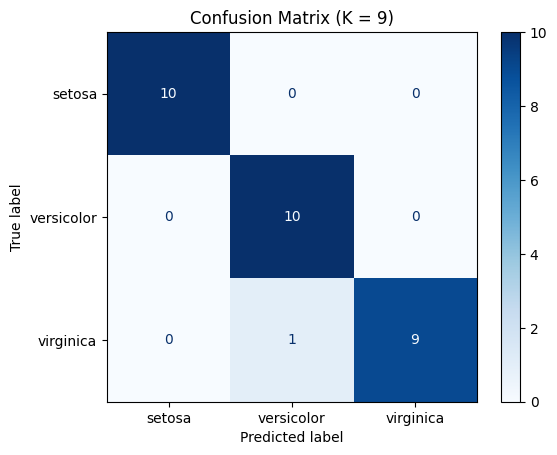

In [12]:
k = [1,3,5,7,9]
accuracies = []

for i in k:
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  accuracy=accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"K = {i}, Accuracy = {accuracy}")

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
  disp.plot(cmap=plt.cm.Blues)
  plt.title(f"Confusion Matrix (K = {i})")
  plt.show()

## Decision Boundary Visualization (for best K)

In [13]:
best_k = k[accuracies.index(max(accuracies))]
best_model= KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

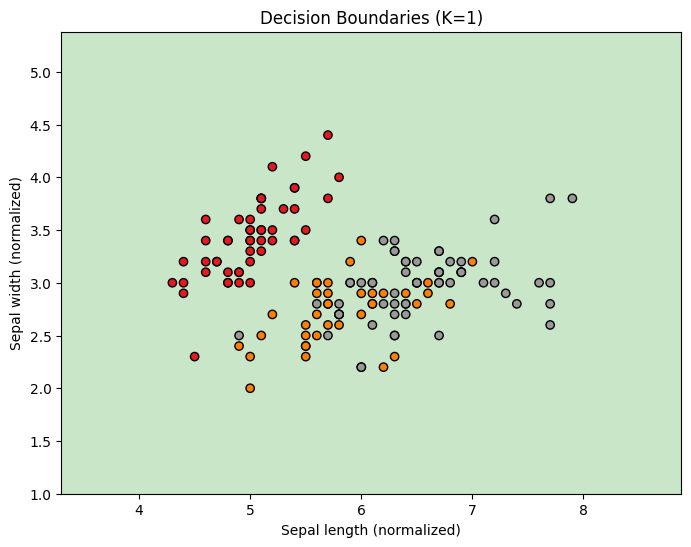

In [17]:
# Create mesh grid
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create a mesh grid with 4 features, keeping the last two at their mean
X_mean = X.mean()
xx_full = np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), X_mean.iloc[2]), np.full_like(xx.ravel(), X_mean.iloc[3])]


Z = best_model.predict(xx_full) # Predict on the full mesh grid
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.title(f"Decision Boundaries (K={best_k})")
plt.xlabel("Sepal length (normalized)")
plt.ylabel("Sepal width (normalized)")
plt.show()